# Projeto de ciencia de dados -  Análise de viagens Uber usando Python

In [3]:
# importando as bibliotecas necessarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# importando os dados obtido de um arquivo csv

data = pd.read_csv("uber-raw-data-sep14.csv")
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime) 
data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


## Preparando os dados

In [5]:
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)
print(data.head())

            Date/Time      Lat      Lon    Base  Day  Weekday  Hour
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512    1        0     0
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512    1        0     0
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512    1        0     0
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512    1        0     0
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512    1        0     0


C:\Users\3476652-9\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hour', ylabel='Density'>

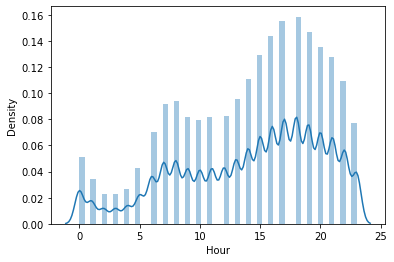

In [6]:
sns.distplot(data["Hour"])

C:\Users\3476652-9\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekday', ylabel='Density'>

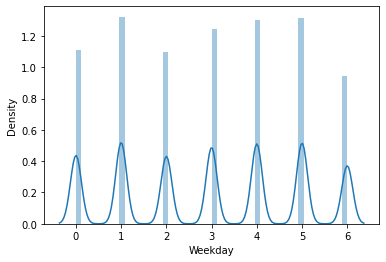

In [7]:
sns.distplot(data["Weekday"])

<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

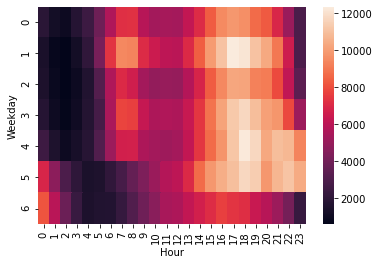

In [8]:

# Correlation of Weekday and Hour
df = data.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)

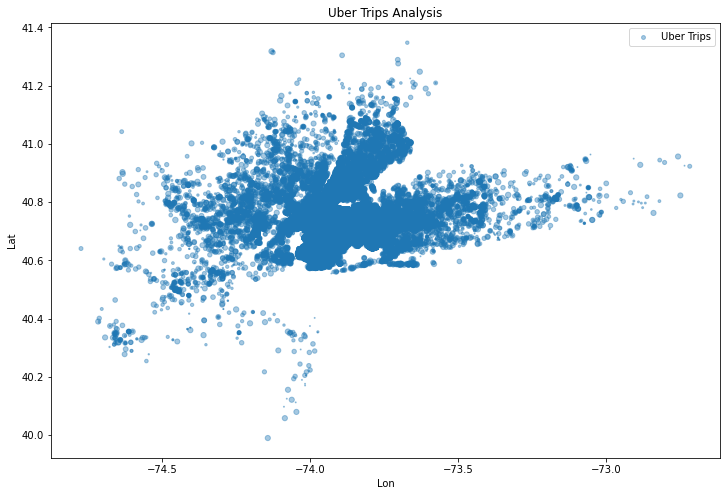

In [9]:

data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=data['Day'], label='Uber Trips',
figsize=(12, 8), cmap=plt.get_cmap('jet'))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()

#### Segunda-feira é o dia mais lucrativo para o Uber
#### Aos sábados menos pessoas usam Uber
#### 18h é o dia mais movimentado para o Uber
#### Em média, um aumento nas viagens do Uber começa por volta das 5h.
#### A maioria das viagens do Uber tem origem perto da região de Manhattan, em Nova York.

####  Analise retirada do site medium.com
#### https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9